Dataset Keras dan Learning Rate

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
print("Ukuran Citra Train", train_images.shape)
print("Ukuran Label Train", train_labels.shape)

print("Ukuran Citra Test", test_images.shape)
print("Ukuran Label Test", test_labels.shape)

# Ukuran gamber, dengan 28 x 28 pixel

Ukuran Citra Train (60000, 28, 28)
Ukuran Label Train (60000,)
Ukuran Citra Test (10000, 28, 28)
Ukuran Label Test (10000,)


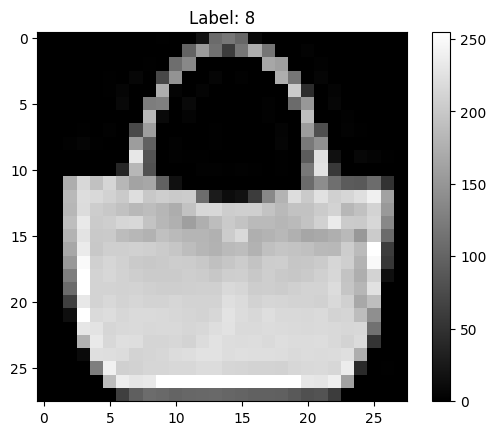

In [3]:
plt.imshow(train_images[100], cmap='gray')
plt.title('Label: ' + str(train_labels[100]))
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


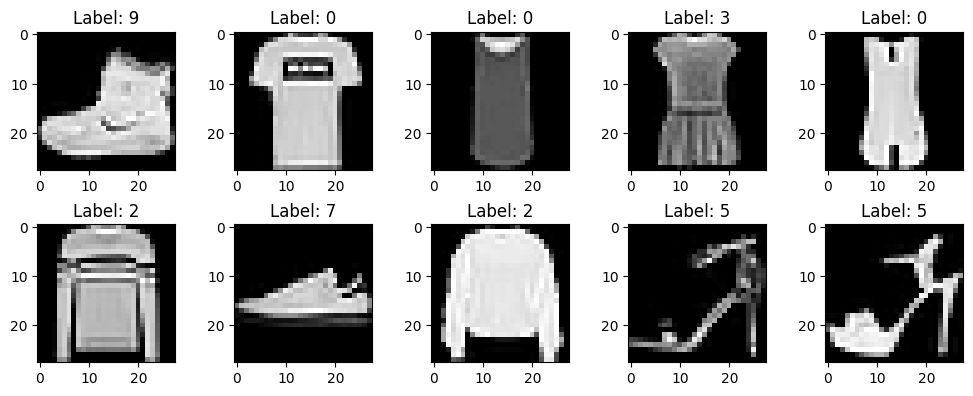

In [5]:
jumlah_baris = 2
jumlah_kolom = 5
jumlah_gambar = 10
gambar, axes = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(2 * jumlah_kolom, 2*jumlah_baris))

for i in range(jumlah_gambar):
    gambar = axes[i // jumlah_kolom, i % jumlah_kolom]
    gambar.imshow(train_images[i], cmap='gray')
    gambar.set_title('Label: {}' .format(train_labels[i]))

plt.tight_layout()
plt.show()


In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
# Arsitektur modelnya

import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [8]:
# Compile modelnya
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_images, train_labels, 
    epochs=100, 
    batch_size=128
)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5624 - accuracy: 0.8018
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3867 - accuracy: 0.8602
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3415 - accuracy: 0.8752
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3153 - accuracy: 0.8845
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2940 - accuracy: 0.8907
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2784 - accuracy: 0.8967
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2655 - accuracy: 0.9014
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2529 - accuracy: 0.9057
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2438 - accuracy: 0.9087
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2357 - accura

batch size/ukuran batch = ini adalah hyperparameter yang menentukan jumlah contoh training yang digunakan dalam 1 iterasi

In [14]:
prediksi = model(test_images)
prediksi = prediksi.numpy() # Supaya hasilnya array
prediksi_label = np.argmax(prediksi, axis=1)
prediksi_betul = prediksi_label == test_labels
print(f"accuracy: {prediksi_betul.mean():.2f}")

accuracy: 0.89


In [15]:
prediksi_label

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)